# SMD Übungszettel Nr. 6

Abgabe von: __Pape, Kusurmann und Becker__

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

np.random.seed(8)

## Aufgabe 15

### Aufgabenteil a)

Eine großer unterschied in der Größenordnung könnte einen Indices für ein verrauschten Datensatz sein, deshalb könnte es passieren, dass der Klassifiziere nicht mehr genau ist. 
Eventuell teilt man den Datensatz zu Beginn erstmall handisch in Untermengen auf in dem die Unterschiede nicht mehr so groß sind und wendet dann denn klassifizierer darauf an

Zusätzlich könnnen Probleme mit dem Abstandsmaß entstehen, im Abstandsmaß oder so.

### Aufgabenteil b)

Der `KNN` Algorithmus wird als _lazy_ bezeichnet, weil es keine wirklich bzw. eine sehr kurze Transingsphase gibt. Der Testtranigssatz wird immer mit Hilfe des Traningsdatensatz 
verglichen und klassifiziert. 

Aus diesem Grund skaliert die Anwendungsphase sehr stark mit der Datenmenge.

Ein SVM sucht lediglich den Punkt der jeweiligen Menge der minimal zu der Hyperebene liegt. Anschließende Klassifizierungen werden immer mit Hilfe der Hyperebene durchgeführt und der Tranningsdatensatz wird nicht mehr benötigt. 

Eine gute Erklärung findet sich hier [hier](https://medium.com/@adi.bronshtein/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7)

### Aufgabenteil c)

In [2]:
import knn

In [3]:
X, y = make_blobs(n_samples=500, n_features=2, centers=2, random_state=12, cluster_std=3)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [5]:
kNN = knn.KNN(10)

kNN.fit(X_train, y_train)

prediction = kNN.predict(X_test)

Text(0.5, 1.0, 'Prediction')

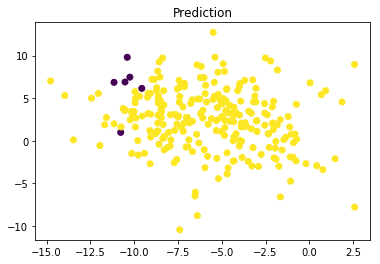

In [6]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=prediction)
plt.title('Prediction')

Text(0.5, 1.0, 'Wahrheit')

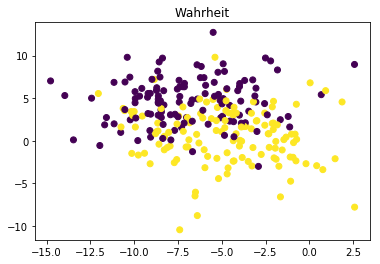

In [7]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('Wahrheit')

### Aufgabenteil d)

In [8]:
signal_df = pd.read_hdf('NeutrinoMC.hdf5', key='Signal')
noise_df = pd.read_hdf('NeutrinoMC.hdf5', key='Background')

Werfe Zeilen mit fehlenden Informationen weg.

In [9]:
signal_clean = signal_df.dropna(how='any')[['NumberOfHits','x', 'y']].values
noise_clean = noise_df.dropna(how='any')[['NumberOfHits','x', 'y']].values

In [10]:
traningset = np.concatenate((signal_clean[:5000], noise_clean[:5000]))
label = np.append(np.zeros(len(signal_clean[:5000])), np.ones(len(noise_clean[:5000])))

testset = np.concatenate((signal_clean[5000:15000], noise_clean[5000:25000]))
testset_label = np.append(np.zeros(len(signal_clean[5000:15000])), np.ones(len(noise_clean[5000:25000])))


In [47]:
kNN_neutrino = knn.KNN(20)
kNN_neutrino.fit(traningset, label)

In [48]:
kNN_neutrino.predict(traningset)

array([0., 0., 0., ..., 1., 1., 1.])

In [49]:
prediction_neutrion = kNN_neutrino.predict(testset)

Text(0.5, 1.0, 'Reality')

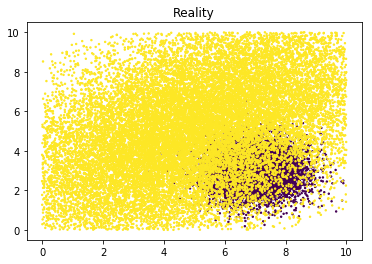

In [50]:
plt.scatter(testset[:,1], testset[:,2], c=testset_label, s=2)
plt.title('Reality')

Text(0.5, 1.0, 'Prediction')

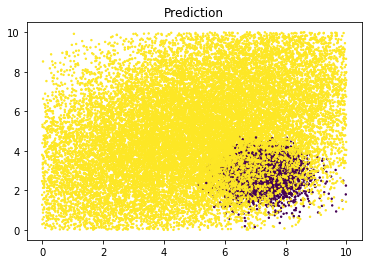

In [51]:
plt.scatter(testset[:,1], testset[:,2], c=prediction_neutrion, s=2)
plt.title('Prediction')

In [82]:
tp = sum( testset_label[kNN_neutrino.label_predict==0] == 0)
tn = sum(testset_label[kNN_neutrino.label_predict==1] == 0)
fn = sum(testset_label[kNN_neutrino.label_predict==0] == 1)
fp = sum( testset_label[kNN_neutrino.label_predict==1] == 0)

In [101]:
reinheit = tp/(tp + tn)
effizienz = tp/(tp+fn)

In [104]:
print(f'Reinheit: {reinheit:.2}')
print(f'Effizienz: {effizienz:.2}')

Reinheit: 0.52
Effizienz: 0.96


## Aufgabe 16

### Aufgabenteil a)

In [91]:
n_p = 9 
n_pn = 5
n = n_p + n_pn

In [19]:
test = [n_p, n_pn]
sum(test)

14

In [20]:
entropie_root = - (n_p/n * np.log2(n_p/n) + n_pn/n * np.log2(n_pn/n))

In [21]:
print(f'Die Entropie an der Wurzel beträgt: {entropie_root:.2}')

Die Entropie an der Wurzel beträgt: 0.94


### Aufgabenteil b)

In [118]:

n_w = 6
n_nw = 9

n_pw = 3
n_pwn = 6

In [122]:
H_go_windy = - (n_pw / n_w * np.log2(n_pw / n_w) + n_pwn / n_w * np.log2(n_pwn / n_w) )
H_go_notwindy = -(n_pw / n_nw * np.log2(n_pw / n_nw) + n_pn / n_nw * np.log2(n_pwn / n_nw))

H_go_wind = n_w/n * H_go_windy + n_nw/n * H_go_notwindy

information_gain = entropie_root - H_go_wind

In [121]:
print('Der Informationsgehalt bei einem Schnitt',
       f'auf dem Attribut Wind durchgeführt wird,\n liegt bei {information_gain:.2}')

Der Informationsgehalt bei einem Schnitt auf dem Attribut Wind durchgeführt wird,
 liegt bei 0.18


In [126]:
temp = [29, 26, 28, 21, 20, 18, 17, 22, 20, 24, 24, 22, 27, 22]
vorhersage = [2, 2, 1, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0]
luftfeuchtigkeit = [80, 90, 70, 90, 80, 70, 65, 90, 70, 80, 70, 90, 75, 80]
wind = [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1]
fußball = [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

In [139]:
df_test = pd.DataFrame()
df_test['temp'] = temp
df_test['vor'] = vorhersage
df_test['luftf'] = luftfeuchtigkeit
df_test['wind'] = wind
print(len(wind), len(fußball))

14 14


In [142]:
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf.fit(np.array(wind).reshape(-1, 1), fußball)
tree.export_graphviz(clf,out_file='test.dot') 

### Aufgabenteil c)

In [25]:
def H(end_state, test_state):
    n = sum(end_state)
    H = []
    for i in test_state:
        H_i = []
        for j in end_state:
            H_i.append( -j/n *  np.log2(j/i))
           
        H.append(sum(H_i))
    return sum(H)        

Informationsgehalt bei Schnitt auf dem Attribute der _Wettervorhersage_.

In [26]:
# negativ weather forecast
n_s = 5
# neutral weather forecast
n_n = 4
# positiv weather forecast
n_g = 5

In [27]:
H_forecast = H([n_p, n_pn], [n_s, n_n, n_g])

information_gain_forecast = entropie_root - H_forecast

In [28]:
print('Der Informationsgehalt bei einem Schnitt',
       f'auf dem Attribut Wettervorhersage durchgeführt \n wird, liegt bei {information_gain_forecast:.2}')

Der Informationsgehalt bei einem Schnitt auf dem Attribut Wettervorhersage durchgeführt 
 wird, liegt bei 2.9


Informationsgehalt bei Schnitt auf dem Attribute _Luftfeuchtigkeit_.

In [29]:
# Luftfeuchtigkeit x >= 90 %
n_90 = 4
# Luftfeuchtigkeit 90 > x >= 80 %
n_80 = 4
# Luftfeuchtigkeit 80 > x >= 70%
n_70 = 5
# Luftfeuchtigkeit 70 >x >= 60%
n_60 = 1

H_humanity = H([n_p, n_pn], [n_90, n_80, n_70, n_60])

inforamtion_gain_humanity = entropie_root - H_humanity

In [30]:
print('Der Informationsgehalt bei einem Schnitt',
       f'auf dem Attribut Luftfeuchtigkeit durchgeführt \n wird, liegt bei {inforamtion_gain_humanity:.2}')

Der Informationsgehalt bei einem Schnitt auf dem Attribut Luftfeuchtigkeit durchgeführt 
 wird, liegt bei 6.1


## Aufgabe 17

### Aufgabenteil a)

Solche Datentypen sollten zu Zahlen (statistisch verwendbare Datentype) konvertiert werden. 


### Aufgabenteil b)

Normierung wichtig um Daten auf die selbe Skala zu bringen -> Numerische Stabilität?
Vlt auch besser für Transformationen - zumindest für manche?
Oder um sich besser realivee Abstände zu veranschaulichen.
Bei ungleichmäig verteilten Datensätzen.

### Aufgabenteil c)

Wenn die Daten nicht rekonstruiert werden können, sollte sie nicht mit berücksichtigt werden.

### Aufgabenteil d)

Werden Daten zusammen gefügt sollten folgende Dinge beachtet werden:

- Daten besitzen die selbe Anzahl an Features
- Man sollte die Daten eventuell label, um später eine zurück indentifizierung zu ermöglichen (das könnte bspw. wichtig sein, wenn Fehler oder Unstimmigkeiten auftreten)
- Beide Datensätze sollten auf den selben Datentyp konvertiert werden


### Aufgabenteil e)

Es sollten die Daten entfernt werden die die wenigste Information erhalten. Hierzu kann zum Beispiel eine Hauptkomponentenanalyse verwendet werden. Allgemein soll also eiene Dimensionreduktion vorgenommen werden.
Außerdem sollten unvolsständige Datensätze entfernt werden. 

Was sind simulationsbasierende Methoden?

## Aufgabe 18

### Aufgabenteil a)